# Reddit's Most Discussed Stocks
In late January of 2021, Reddit, specifically the subreddit Wallstreetbets, made national headlines with the now famous 'meme' stock of Gamestop.  On Wallstreetbets, it was noticed that the short interest float in Gamestop was over 100% which led to a short squeeze that sent the price of Gamestop from around 4 USD all the way to almost 500 USD.  Given this incredible gain, retail investors flooded the market and the userbase of Wallstreetbets grew by millions.

Given the success of Gamestop, there have been many stocks that have followed in similar patterns.  As an investor, one would like to stay ahead of the masses and try to pick stocks that may be just gaining interest.  It's very hard to constantly be on these subreddits trying to pick the right stocks.

In this project, we utilize Reddit's API to extract what stocks are being discussed most frequently in different subreddits or in actual threads.  In the program we offer the user many different options on where to look, when, to include penny stocks or not, and how to visualize the results. When visualizing the results, if no additionaly visualization options are chosen, the results will show just the top 10 ticker mentions. To gain further insight into the mentioned tickers, the user can then choose to include a sentiment analysis regarding the ticker mentions, a time graph showing how the ticker mentions increase over time, and finally a Put's vs Call's ratio for each of the ticker mentions. All chosen options are then saved in to their respecitve files.  The program I wrote is proprietary, so I will only be running and discussing the program for illustrative purposes.

Hopefully, by automating the stock ticker counts, we can then research the stocks and make educated decisions on what could possibly be a lucrative stock to invest in.

# Using the Program
The program begins by offering the user a few different options.  We ask if they want to scrape a Thread or Subreddit.  When browsing Reddit, a Subreddit is a section of Reddit dedicated to a topic.  For example, Wallstreetbets is a Subreddit.  Within this Subreddit, there are many different Threads.  Wallstreetbets has daily discussions that are very popular.  A couple of extremely popular Threads are the "Daily Discussion Thread For (specific date)" and "What Are Your Moves For Tomorrow, (specific date)".  Both of those typically get around 20,000 comments in a day.  

When the user chooses Thread, they need to input the exact Thread link.  If they choose Subreddit, they need to specify which one, ie Wallstreetbets, Stocks, Investing, etc.  Continuing with a Subreddit, the user needs to specify what day they are interested in to scrape all the Thread titles for that day.  Then they'll be asked if they want to include the main post for each Thread.  The main post is the section of the Thread where the creator of the Thread includes their post.

Regardless of whether the user chooses Thread or Subreddit, the next question will be if they want to include Penny Stocks.  Penny Stocks are very risky and volatile.  They also aren't listed on the main Stock Exchanges and some platforms don't even let you trade them.  Due to this, Subreddits like Wallstreetbets and Stocks ban those tickers from being discussed.  So the user may not want to include these since they're not supposed to be discussed in these Subreddits.  However, if the user is interested in Subreddits such as Pennystocks, they'll want to include these.

Next are the visualization options. Here we have the option of including the sentiment, a time series graph, and a Call's vs Put's graph. The Wallstreetbets Daily Discussion Thread's typically have around 20K comments each day. Here is where these visualizations truly shine. The top ticker can be mentioned upwards of a thousand times and understanding more about these tickers is very helpful. The overall sentiment can help the user gain insight into whether the majority of posts are positive or negative. The Put's vs. Call's can illustrate this a bit further to see the ratio between the two and overall counts of these options. The time series graph helps the user see as the day progresses, how the ticker mentions grow when compared to other. The stock market can swing wildly through out the day, and based on overall counts, this can be potentially visualized by the ticker counts. 

However, when scraping just Subreddits, the visualizations aren't as helpful nor as powerful as they are when scraping Threads due to the significantly lower amounts of data received. Subreddits typically only receive a handful of new threads each day compared to threads 20K or so comments. Additionaly, I tuned the program to only count the ticker once per comment to avoid a single comment referecning to the same ticker over and over, thus artificially raising the ticker count. Therefore, when choosing just the Subreddit, sticking with just the overall ticker count and sentiment is the most meaningful. 

Lastly, the user is asked what name they want to save the Dataframe as.  Once the program has finished, the user can have access to the stock ticker counts, the full dataframe containing all the comments to explore further, and all the visualizations.

# How the Program Works
The program utilizes the PRAW library to converse with Reddit's API to scrape the data.  On the backend of PRAW, when scraping the data, PRAW helps by automatically parsing the JSON and extracting out what the user is requesting.  This can be anything like comments, titles, dates, etc.

Based on what the user asked to scrape for, the program will then compile a Dataframe and print out the Titles, Comments, etc.  For display purposes in Jupyter, we limited this to the first 10 posts.  Once the Dataframe is compiled, we save it as a CSV file.

Next, we import all of the Stock Exchanges Tickers and Security Names.  If the user requested to include Penny Stocks, we then import those as well.  We do some data cleaning to extract out just the Ticker and Security Name in the format that will help with the counting.  We have a list of frequently misclassfied Tickers that we then drop from the Dataframe to help keep the counts accurate at the end of the program.  Once clean, we create a dictionary with all the Ticker's and Security name's with a 0 count.  Using regular expressions, we then loop through the Dataframe and anytime a Ticker or Security Name is mentioned, we increase the count and extract the ticker that's mentioned into a new column in the Dataframe.  

Once the loop is complete, we convert the ticker count dictionary back into a DataFrame, combine any mentions of security names with the ticker name, sort the values, and if no other visualizations are chosen, it print outs the Top 10 and exits.

If Sentiment is chosen a lot of cleaning and filtering takes place on the DataFrame. If the user chooses to add sentiment, we again use regular expressions to filter out the original DataFrame to include only posts that contain Tickers that are in the Top 10 Mentions. We add another new column for which ticker was used in the top 10 per post and then run nltk's <code>SentimenIntesnityAnalyzer()</code>. This is a pretrained sentiment called VADER that gives a score to each post based on overall sentiment (negative, neutral, and positive). With the compound score added to each post, we then take the median score for each ticker and add the score and label to each ticker. The reason we take the median is because the distributions typically have a lot of negative and postive posts, but are typically left or right skewed. Now the program will print out the Top 10 Tickers with Sentiment.

For visualizations, the Sentiment Graph is just a nicer way to visualize the ticker count. The time graph filters the dataframe with tickers on the time the post occured and neatly graphs each ticker from the Top 10 based on time posted. The Calls vs Puts graph works similarly to the ticker count, but instead of using regular expression to find tickers, finds Put's vs. Call's mentions. This is then grouped into a dataframe based on the ticker mentions and visualized.

Lastly, we display how long the program took to run and then exit.  The user now as access to all of the CSV files and PDF visualizations to explore further.

# Running the Program on a Subreddit
We will now run the program for a Subreddit's Titles and Main Posts.  Given that we are only doing a subreddit, we'll only include sentiment.

Beginning Program at:  Wed, 16 Feb 2022 09:37:23
Thread or Subreddit?: subreddit
Which subreddit? ie. wallstreetbets: wallstreetbets
What day? Must be in the last few days (9,10,11,etc.): 14
Include main post?: yes
Include Penny Stocks?: no
Include Top 10 Sentiment Analysis?:  yes
Include Top 10 Mentions Over Time Graph?:  no
Include Top 10 Puts vs Calls Ratio Graph?:  no
Save DataFrame under what filename?: Wallstreetbets Subreddit Post's - February 14th, 2022
Extracting comments...
------------------------------------------------------------
First 10: 
------------------------------------------------------------
POST TITLE#  1 :  How many of you are trading as LLC?
POST TITLE#  2 :  The Ukrainian president trolled the international media telling an invasion was imminent this Wednesday
POST TITLE#  3 :  Week 6 Earnings Plays Analysis and Historical Post Earnings Moves Compilation - $NVDA, $ROKU, $PLTR, $RBLX, $UPST, $DASH, $ABNB, and More
POST TITLE#  4 :  ROKU No Hero Academia
POST T

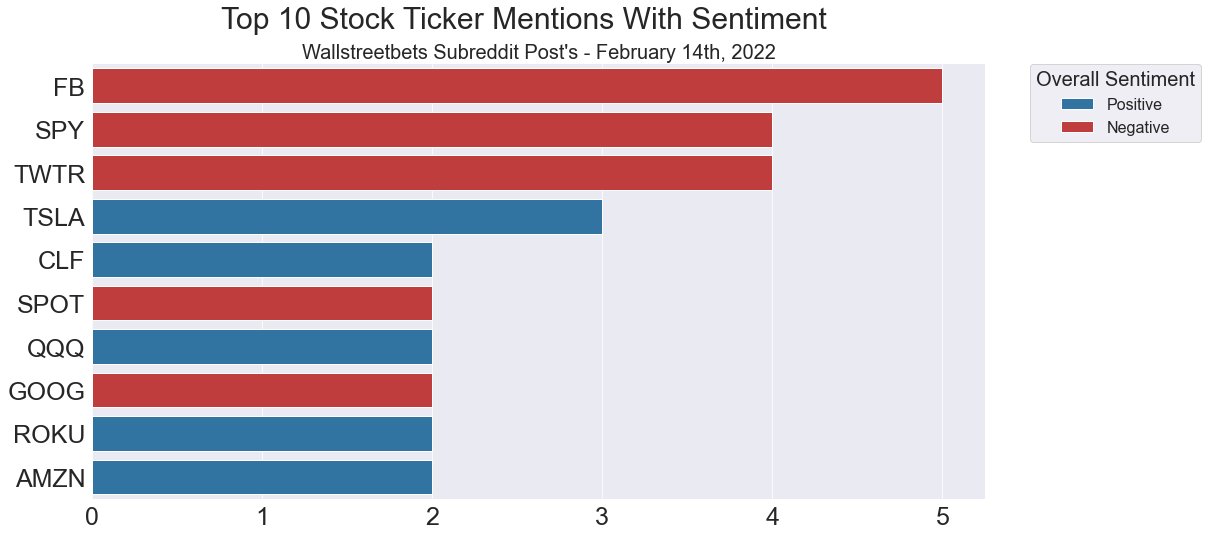

In [3]:
%run reddit_j_v4.py

It looks like the program was a success!  It only took 1 minute and 27 seconds and it extracted out the most discussed Tickers.  We can see that within the Title + Main Post's for June 18th on Wallstreetbets, FB, SPY, TWTR, TSLA, and CLF were the top 5 and overall sentiment was mostly negative except for Tesla and Clevland-Cliffs Inc. 

# Running the Program on a Thread
We will now run the program on a Thread.  With threads typically having thousands of posts, the more data we get, the more accurate our program will become.  Since Wallstreetbets really started this movement and the Daily Discussion Threads offer the most comments, this will give us a better picture on what's being discussed the most. 

Let's run the program on the "Daily Discussion Thread for February 15, 2022" and we'll utilize all of the program's features.

Beginning Program at:  Wed, 16 Feb 2022 09:44:54
Thread or Subreddit?: thread
What is the full Reddit Thread Link?: https://www.reddit.com/r/wallstreetbets/comments/st0fbk/daily_discussion_thread_for_february_15_2022/
Include Penny Stocks?: no
Include Top 10 Sentiment Analysis?:  yes
Include Top 10 Mentions Over Time Graph?:  yes
Include Only First 24 Hours for Time Graph?: yes
Include Top 10 Puts vs Calls Ratio Graph?:  yes
Save DataFrame under what filename?: Wallstreetbets Daily Discussion - February 15, 2022
Extracting comments...
------------------------------------------------------------
TITLE:  Daily Discussion Thread for February 15, 2022
------------------------------------------------------------
MAIN POST:  Your daily trading discussion thread. Please keep the shitposting to a minimum.  .......
------------------------------------------------------------
Extracting comments...
First 10: 
------------------------------------------------------------
POST#  1 :  When im rich, 

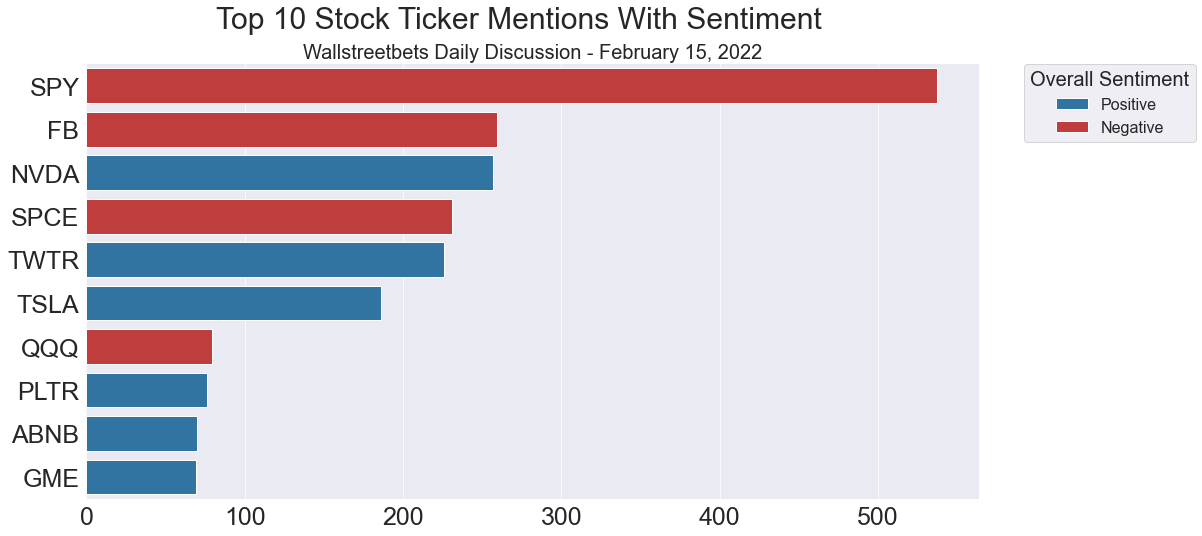

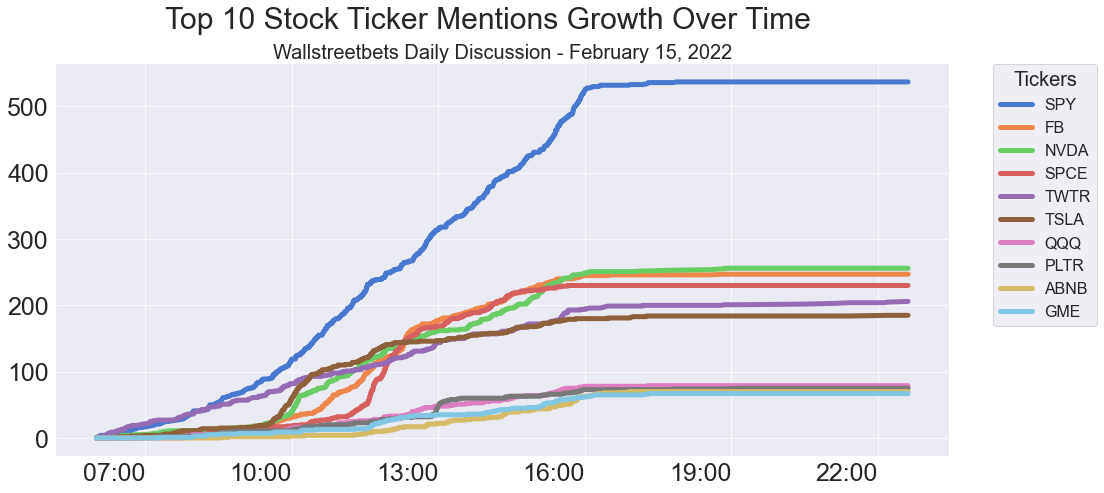

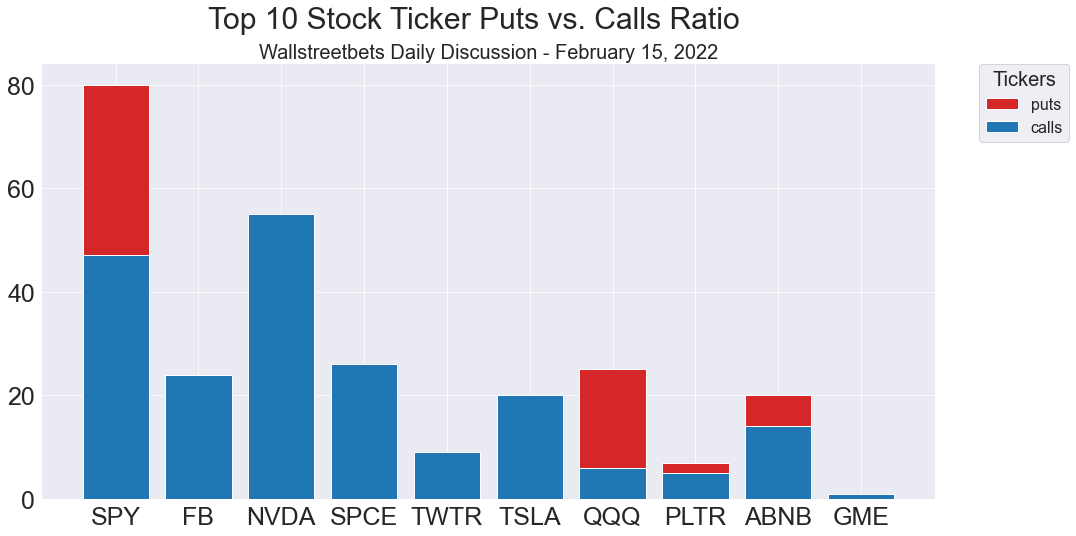

In [4]:
%run reddit_j_v4.py

Success!  The program took substantially longer to finsh at 3 hours and 5 minutes. Looking at the Top 5 Stock Tickers, they were SPY, FB, NVDA, SPCE, and TWTR. Very similar to the top 5 tickers from the previous day's subreddits posts. SPCE (Virgin Galatic) made an appearance due to Virgin Galactic offering up the ability to purchase tickets to go to Space for $450,000 a ticket. This caused quite a rally with the stock and it surged 30 percent that day. Overall, the sentiment seemed negative, albeit, very slightly at a -0.052 score. With 0 being a neutral rating.

If we look at the time series graph a few things stand out. All ticker mentions start to plateau around 4:00 pm. This makes sense since the Stock Market closes at 4:00pm. Also, SPCE seemed to gain quite a lot a traction around 12:00 pm. The news of the tickets came out early and the stock began to rally as soon as it opened. Come 12:00pm the rally was already at the peak. Most of the comments were likely too late, however, in the beginning of the day, when the news wasn't as widespread, there was still traction building with SPCE. Lastly, SPY received the most comments by far and steadily, almostly linearly, grew through out the day. It was a pretty flat day for SPY, so most of the mentions were likely speculating what was going to happen next.

Next, if we vist the Put's vs. Call's graph we can see SPY again has the most mentions and with a little over 50 percent of the mentions referencing Call options, you would think sentiment would have been a bit more positive. NVDA earning's are to be released within the next day or so and obviously with both sentiment positive and only Call options being mentioned. It's likely that the overall sentiment is they will crush earnings.

Now that we have all of the CSV files saved, let's choose one of the files to explore further. We have a few options to choose from. We can either choose the original DataFrame with all comments. A dataframe with all tickers extracted. Lastly, a dataframe that filters by the comments with tickers in the Top 10. Let's load that one in.

In [5]:
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None)
wsb_top_10 = pd.read_csv('Wallstreetbets Daily Discussion - February 15, 2022/Wallstreetbets Daily Discussion - February 15, 2022_only_top_10.csv')

In [6]:
wsb_top_10.head()

,Unnamed: 0,body,time,ticker,top_10,scores,compound,comp_score
0,1,Your daily trading discussion thread. Please k...,1.644923e+09,['TWTR'],['TWTR'],"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...",0.3802,pos
1,10,Remember when Branson pumped his own stock wit...,1.644944e+09,"['FARM', 'SENT', 'SPCE']",['SPCE'],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,11,#Ban Bet Won\n---\n\n/u/joseflopez (1/0) made ...,1.644945e+09,['NVDA'],['NVDA'],"{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...",0.7964,pos
3,15,I think bears and bulls can all agree on two t...,1.644943e+09,['SPY'],['SPY'],"{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.3612,pos
4,22,My last $1k in Spy puts,1.644935e+09,['SPY'],['SPY'],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


Here we can see how all the data is utilized. In the <code>'body</code> we have the user comment. In the <code>'ticker'</code> column we have a list of the extracted stock tickers and in the <code>'top_10'</code> we have tickers that were in the Top 10 most mentioned. Next we can see how each post was scored based on Negative, Neutral, and Positive sentiment with an overall compound score and label.

Now that we have the data all load in, if we're interested in a certain ticker from the top 10, we can filter based on that one. Let's explore SPY a bit further since it was the most mentioned.

In [7]:
spy_mentions = wsb_top_10[wsb_top_10['top_10'].str.contains('SPY')]
spy_mentions.head()

,Unnamed: 0,body,time,ticker,top_10,scores,compound,comp_score
3,15,I think bears and bulls can all agree on two t...,1.644943e+09,['SPY'],['SPY'],"{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.3612,pos
4,22,My last $1k in Spy puts,1.644935e+09,['SPY'],['SPY'],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
13,76,SPY has been trading within a 0.1% range for o...,1.644945e+09,['SPY'],['SPY'],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
19,97,Russia invades \n\nBiden goes on TV slurring a...,1.644952e+09,['SPY'],['SPY'],"{'neg': 0.132, 'neu': 0.868, 'pos': 0.0, 'comp...",-0.4215,neg
20,107,Bought 450 spy calls at open. 🤡,1.644937e+09,['SPY'],['SPY'],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


Overall, the sentiment needs to be worked on quite a bit. If we explore the compound score for SPY a bit further, we'll see why.

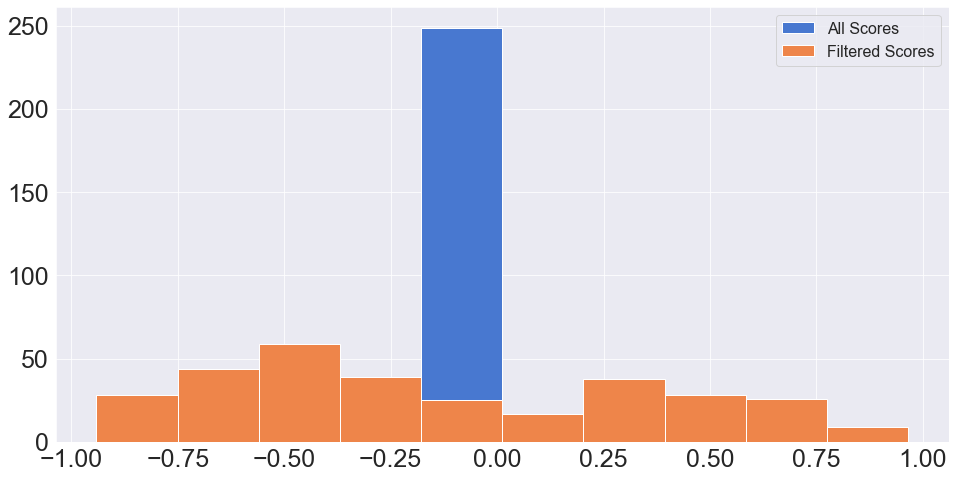

In [8]:
plt.figure(figsize=(16,8))
spy_mentions['compound'].hist(label = 'All Scores')
spy_mentions[spy_mentions['compound'] != 0]['compound'].hist(label = 'Filtered Scores')
plt.legend()

The majority of compound scores for SPY are 0 which implies that the overall sentiment analyzer leaves a bit to be desired.

When running the program, I filter the 0 ratings out and then since of the skewed distribution, I chose the median. Let's grab a few samples posts and see how accurate the sentiment is. 

In [9]:
print(spy_mentions[spy_mentions['compound'] != 0][['body','comp_score']].sample().values[0])

["Ok I'm hedging all my calls with spy puts. Can't go tits up." 'pos']


In [10]:
print(spy_mentions[spy_mentions['compound'] != 0][['body','comp_score']].sample().values[0])

["SPY blew it's load too fast, it's coming back to it's senses with post nut clarity"
 'pos']


In [11]:
print(spy_mentions[spy_mentions['compound'] != 0][['body','comp_score']].sample().values[0])

['This is supposed to be bullish? SPY was 457 like 3 days ago. Bulls are starting to become sad bois'
 'neg']


With three randomly grabbed comments, the sentiment seems to be a relatively good starting point to gain insight into these ticker mentions.

# Next Steps
The pretrained sentiment offers a bit of an indication as to which way the Reddit posters are leaning, but in order to increase the accuracy of the sentiment, I need to go through and manually train the algorithm. Doing this is my primary next step.